## EDA: Exploratory Data Analysis

### Load data and first look

In [132]:
# necessary libraries
import pandas as pd

In [133]:
df = pd.read_excel('C:/Users/danie/Documents/GitHub/customer-loyalty-segmentation/data/raw/online_retail_II.xlsx')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [135]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


### Identification and treatment of missing values (Columns: 'Description' and 'Customer ID')

In [136]:
missing_values = df.isnull().sum()
print(missing_values)

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [137]:
missing_percentage = df.isnull().sum() / len(df) * 100

print(missing_percentage)

Invoice         0.000000
StockCode       0.000000
Description     0.557225
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    20.539488
Country         0.000000
dtype: float64


In [138]:
# the percentage of missing values in description column is 0.55%, so we can drop it and mantain 99,5% of the data
df_cleaned = df.dropna(subset=['Description'])


In [139]:
# the percentage of missing values in CustomerID is 20.5%, a big amount of dataset. Before any decision, we need to check any pattern in the missing values
df_missing_customers = df[df['Customer ID'].isnull()]

df_missing_customers.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


In [140]:
# the objective of clustering is to group customers into segments based on their behavior and characteristics. Without customer ids, it is not possible to identify the specific customers in each segment.
df_cleaned = df_cleaned.dropna(subset=['Customer ID'])

In [141]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB


### Identification and treatment of inconsistent values (Columns: 'Quantity' and 'Price')

In [142]:
df_cleaned['Quantity'].describe()

count    417534.000000
mean         12.758815
std         101.220424
min       -9360.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       19152.000000
Name: Quantity, dtype: float64

In [143]:
df_cleaned['Price'].describe()

count    417534.000000
mean          3.887547
std          71.131797
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       25111.090000
Name: Price, dtype: float64

In [144]:
negative_quantity = df_cleaned[df_cleaned['Quantity'] < 0]

negative_quantity

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [145]:
# Negative quantity values may indicate devolutions or stock returns. The dataset does not provide information about it. I decided to remove those rows.
df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]

In [146]:
# Price = 0 indicates that the product was given away for free by promotion or was part of a promotion
df_cleaned = df_cleaned[df_cleaned['Price'] > 0]

In [147]:
df_cleaned['Quantity'].describe()

count    407664.000000
mean         13.585585
std          96.840747
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       19152.000000
Name: Quantity, dtype: float64

In [148]:
df_cleaned['Price'].describe()

count    407664.000000
mean          3.294438
std          34.757965
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: Price, dtype: float64

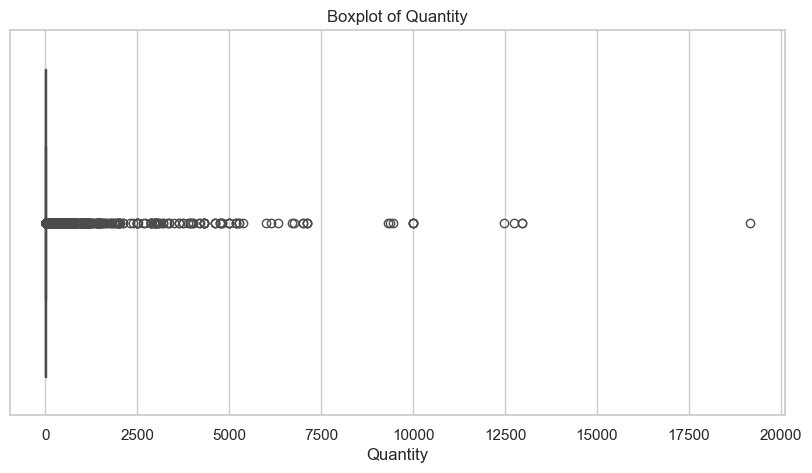

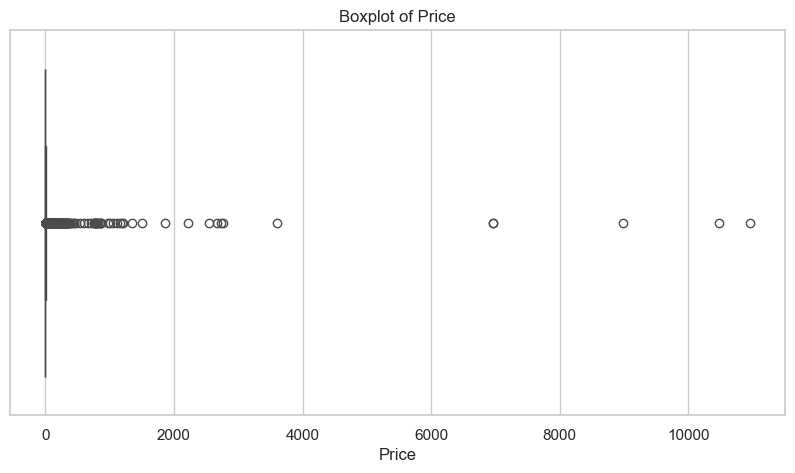

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned['Price'])
plt.title('Boxplot of Price')
plt.show()


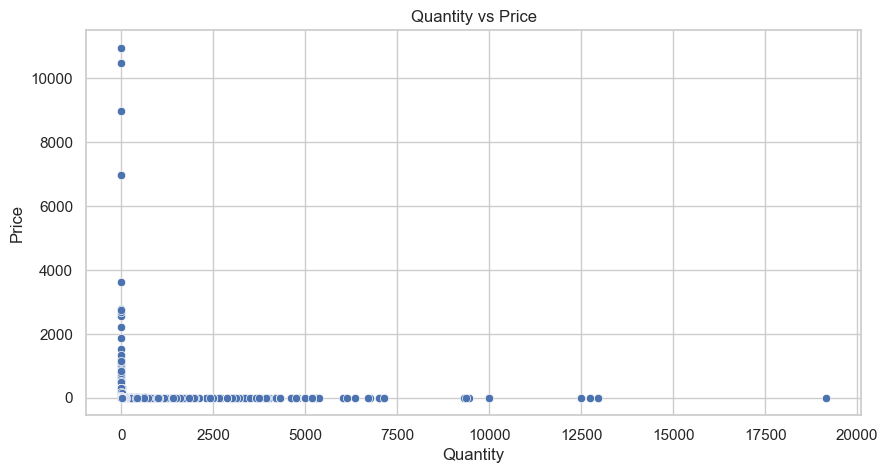

In [150]:
# Gráfico de dispersão de Quantity vs Price
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Quantity', y='Price', data=df_cleaned)
plt.title('Quantity vs Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()


In [151]:
quartiles = df_cleaned['Quantity'].quantile([0.25, 0.5, 0.75, 1.0])
print(quartiles)


0.25        2.0
0.50        5.0
0.75       12.0
1.00    19152.0
Name: Quantity, dtype: float64


In [152]:
# Removing outliers. I decided to remove outliers based on the 95th percentile of the Quantity and Price columns to focus on the most common transactions.
df_cleaned = df_cleaned[df_cleaned['Quantity'] < df_cleaned['Quantity'].quantile(0.95)]
df_cleaned = df_cleaned[df_cleaned['Price'] < df_cleaned['Price'].quantile(0.95)]


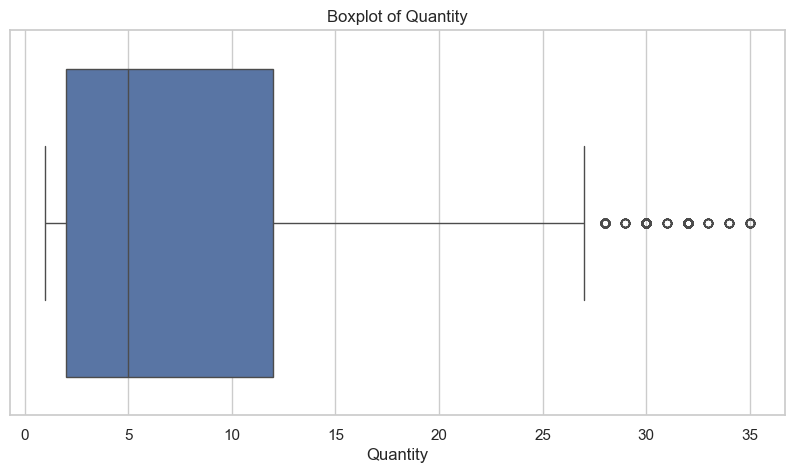

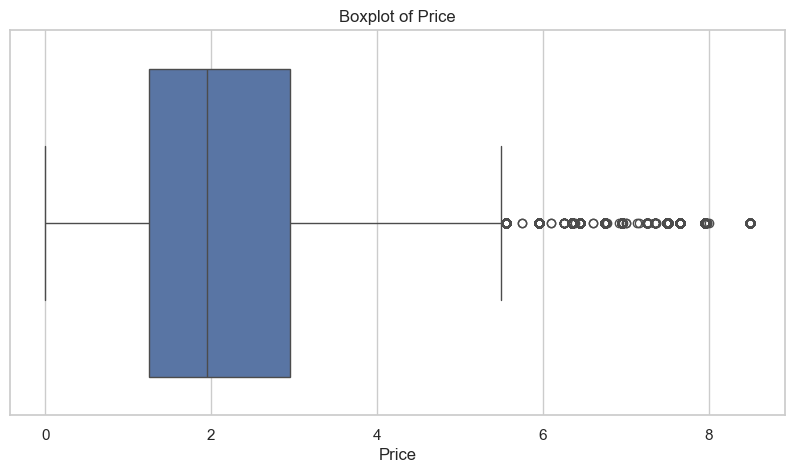

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Plotando boxplot para Quantity
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

# Plotando boxplot para Price
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned['Price'])
plt.title('Boxplot of Price')
plt.show()


### Removing duplicate rows

In [161]:
duplicated_rows = df_cleaned[df_cleaned.duplicated()]

duplicated_rows

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
523258,538035,20728,LUNCH BAG CARS BLUE,3,2010-12-09 13:03:00,1.65,16065.0,United Kingdom
523356,538051,22659,LUNCH BOX I LOVE LONDON,2,2010-12-09 13:24:00,1.95,18041.0,United Kingdom
525170,538155,21907,I'M ON HOLIDAY METAL SIGN,1,2010-12-09 16:52:00,2.10,16907.0,United Kingdom
525293,538166,21915,RED HARMONICA IN BOX,5,2010-12-09 18:09:00,1.25,17965.0,United Kingdom


In [162]:
df_cleaned = df_cleaned.drop_duplicates()

print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")


Number of rows after removing duplicates: 352762
